In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.stats import variation
import warnings
warnings.filterwarnings('ignore') 

# Data Preprocessing

In [220]:
# 加载数据
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight",
                "acceleration", "model_year", "origin", "car_name"]
# 使用空格分隔读取
df = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values='?')

# 只保留连续数值特征（去除 origin, car_name, cylinders, model_year）
continuous_features = ["mpg", "displacement", "horsepower", "weight", "acceleration"]
df_cont = df[continuous_features]

# 缺失值用均值填充
df_cont = df_cont.fillna(df_cont.mean())

In [7]:
df.shape

(398, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [11]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


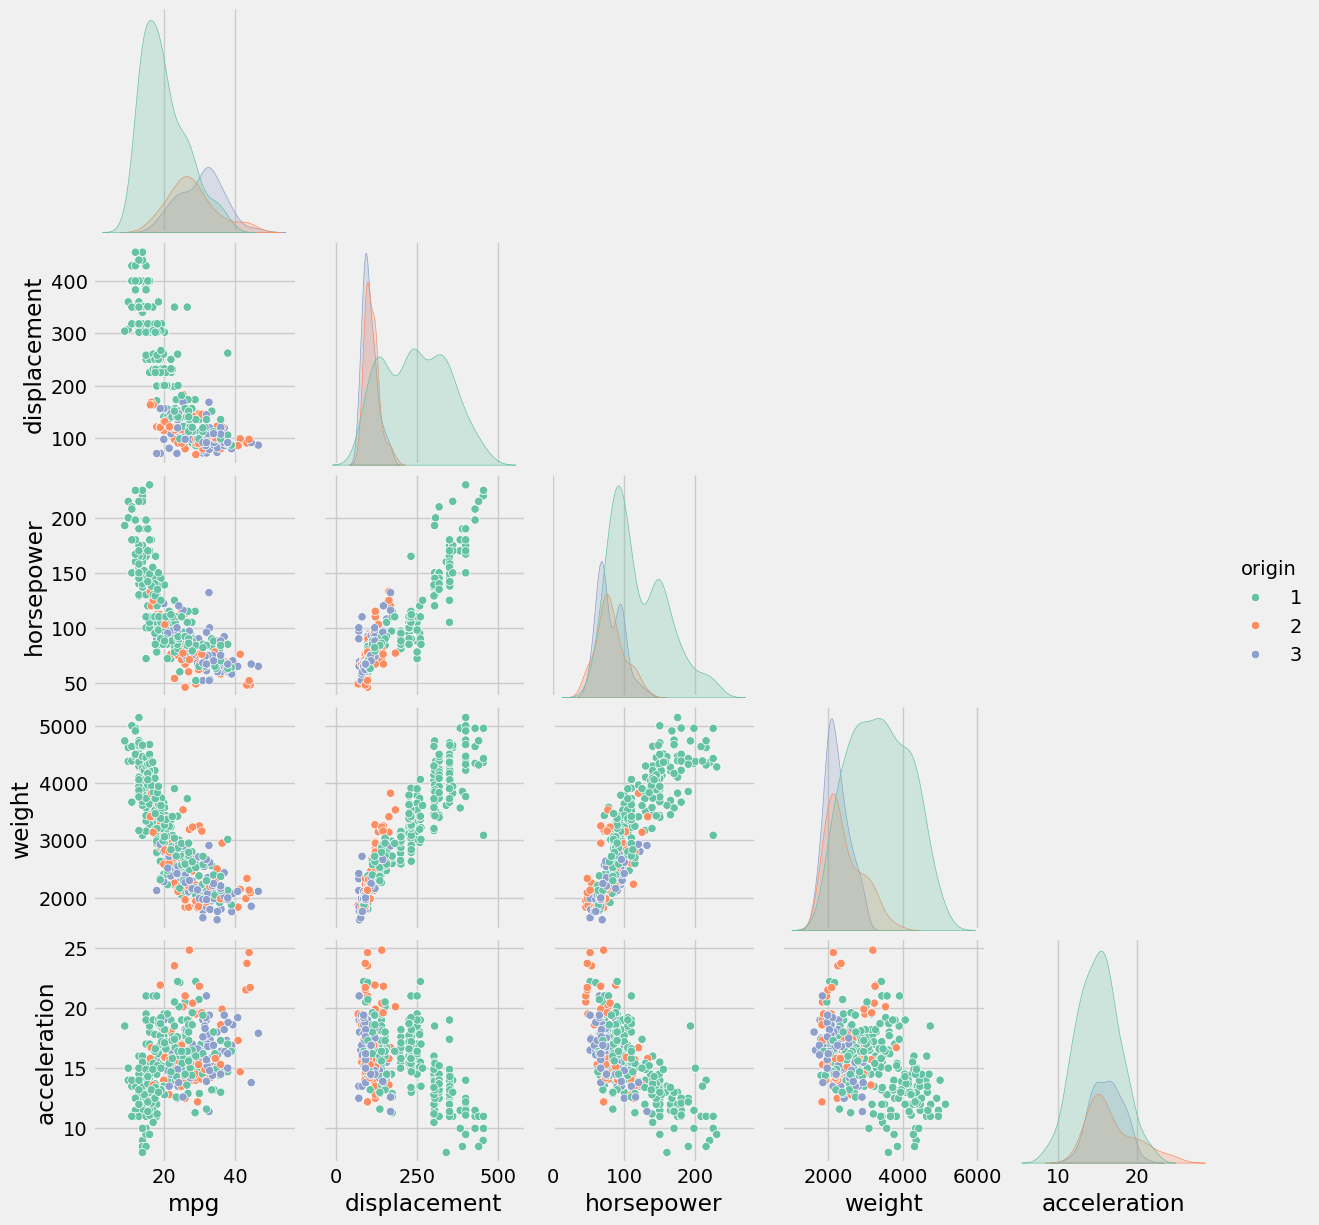

In [124]:
plot_features = ["mpg", "displacement", "horsepower", "weight", "acceleration","origin"]
df_plot = df[plot_features]
sns.pairplot(df_plot, hue = 'origin', corner=True, palette='Set2')
plt.savefig('D:/PythonProject/Pictures/mpg_pairplot.png', dpi = 300)

# Hierarchical Clustering

In [222]:
# 标准化数据（避免量纲影响）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cont)

# 进行层次聚类
cluster = AgglomerativeClustering(n_clusters=3, linkage='average', metric='euclidean')
df['cluster'] = cluster.fit_predict(X_scaled)

# 每个聚类的均值和方差
cluster_stats = df.groupby('cluster')[continuous_features].agg(['mean', 'var'])
print("Cluster statistics (mean and variance):\n", cluster_stats)

# 以 origin 为标签的均值和方差
origin_stats = df.groupby('origin')[continuous_features].agg(['mean', 'var'])
print("Origin class statistics (mean and variance):\n", origin_stats)

Cluster statistics (mean and variance):
                mpg            displacement               horsepower  \
              mean        var         mean          var        mean   
cluster                                                               
0        26.177441  41.303375   144.304714  3511.485383   86.120275   
1        14.528866   4.771033   348.020619  2089.499570  161.804124   
2        43.700000   0.300000    91.750000    12.250000   49.000000   

                          weight                acceleration            
                var         mean            var         mean       var  
cluster                                                                 
0        294.554450  2598.414141  299118.709664    16.425589  4.875221  
1        674.075816  4143.969072  193847.051117    12.641237  3.189948  
2          4.000000  2133.750000   21672.916667    22.875000  2.309167  
Origin class statistics (mean and variance):
               mpg            displacement       

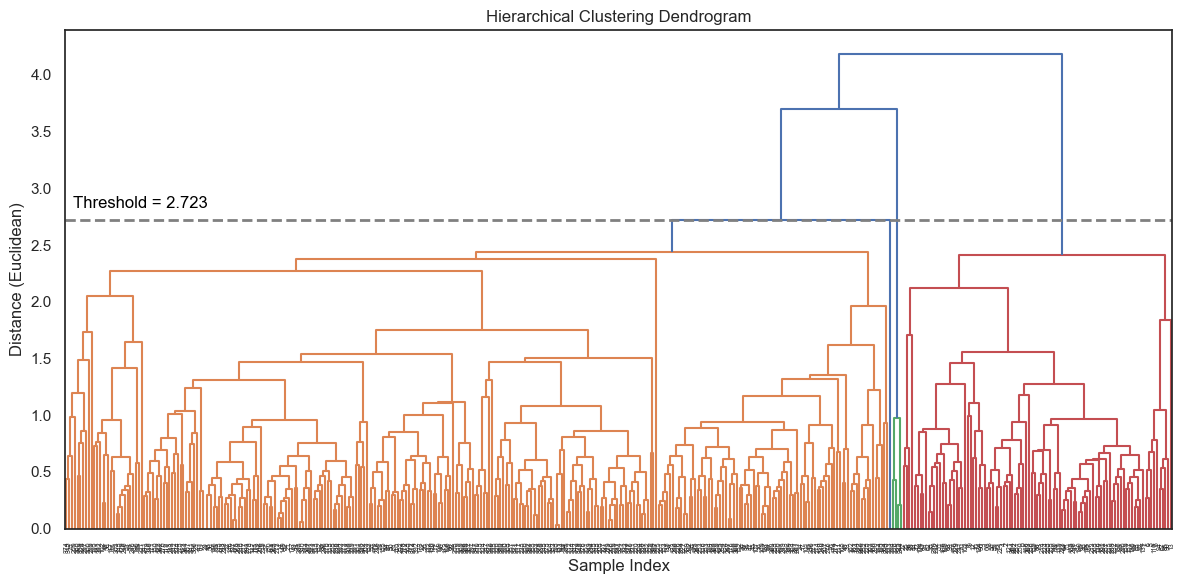

In [211]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import seaborn as sns

# 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cont)

# 计算层次聚类的 linkage 矩阵
linked = linkage(X_scaled, method='average', metric='euclidean')

# 设置画图风格
sns.set(style="white")

# 计算用于剪枝的距离阈值（例如聚成3类，取倒数第3个合并步骤的距离作为阈值）
threshold = linked[-3, 2]

# 绘制 pruned dendrogram（聚成3类）
plt.figure(figsize=(12, 6))
dendrogram(linked,
           color_threshold=threshold,
           truncate_mode=None,  # 不裁剪叶子结点
           p=3,
           show_leaf_counts=True,
           distance_sort='descending')
plt.axhline(y=threshold, c='gray', lw=2, ls='dashed')  # 添加阈值线
plt.text(x=30, y=threshold + 0.1, s=f"Threshold = {threshold:.3f}", color='black')  # 标出阈值文字

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance (Euclidean)")
plt.tight_layout()
plt.savefig('D:/PythonProject/Pictures/mpg_tree1.png', dpi = 300)
plt.show()


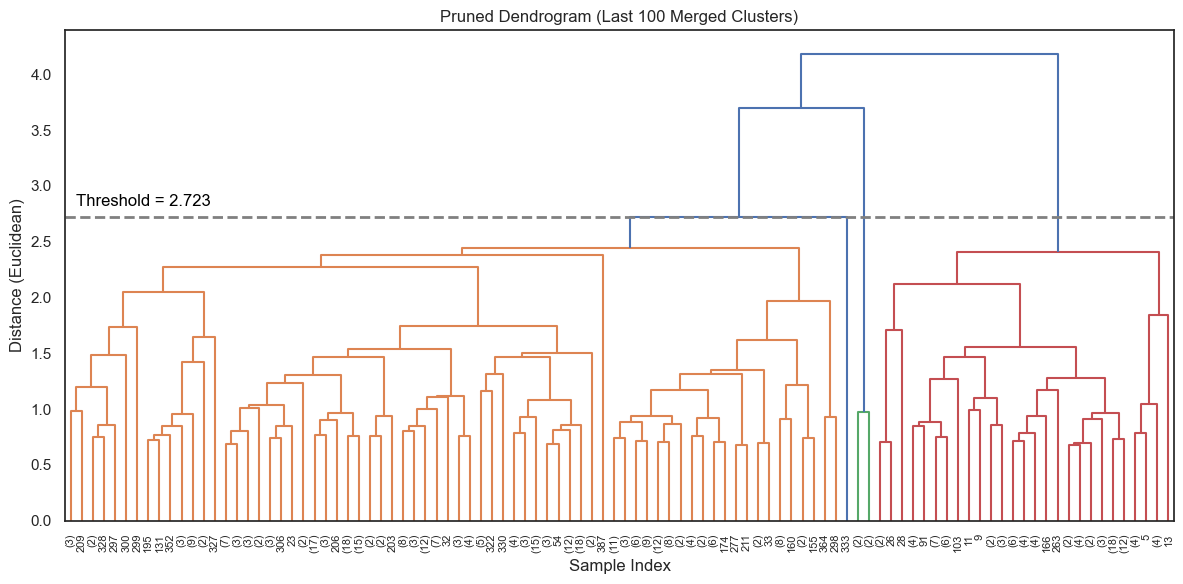

In [213]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import seaborn as sns

# 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cont)

# 计算层次聚类的 linkage 矩阵
linked = linkage(X_scaled, method='average', metric='euclidean')

# 设置画图风格
sns.set(style="white")

# 计算用于剪枝的距离阈值（例如聚成3类，取倒数第3个合并步骤的距离作为阈值）
threshold = linked[-3, 2]

# 绘制 pruned dendrogram（聚成3类）
plt.figure(figsize=(12, 6))
dendrogram(linked,
           color_threshold=threshold,
           orientation='top',
    distance_sort='descending',
    show_leaf_counts=True,
    truncate_mode='lastp',  # Prune the dendrogram
    p=100,                  # Show only the last 100 merged clusters
    leaf_rotation=90.,     # Rotate labels for readability
    leaf_font_size=8.,     # Smaller font for compactness
)
plt.axhline(y=threshold, c='gray', lw=2, ls='dashed')  # 添加阈值线
plt.text(x=10, y=threshold + 0.1, s=f"Threshold = {threshold:.3f}", color='black')  # 标出阈值文字

plt.title("Pruned Dendrogram (Last 100 Merged Clusters)")
plt.xlabel("Sample Index")
plt.ylabel("Distance (Euclidean)")
plt.tight_layout()
plt.savefig('D:/PythonProject/Pictures/mpg_tree2.png', dpi = 300)
plt.show()


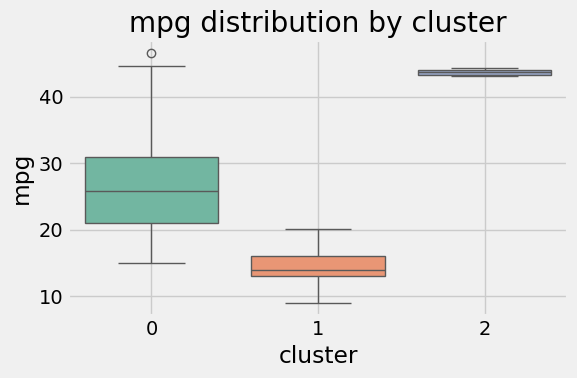

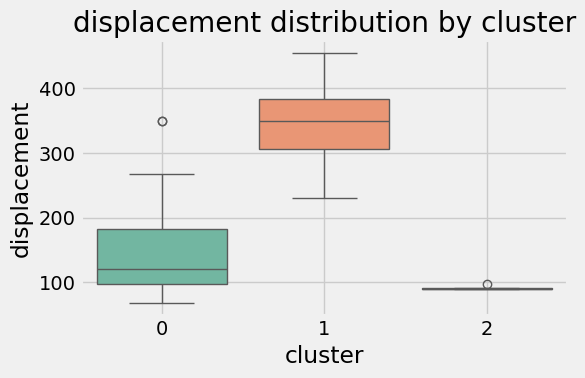

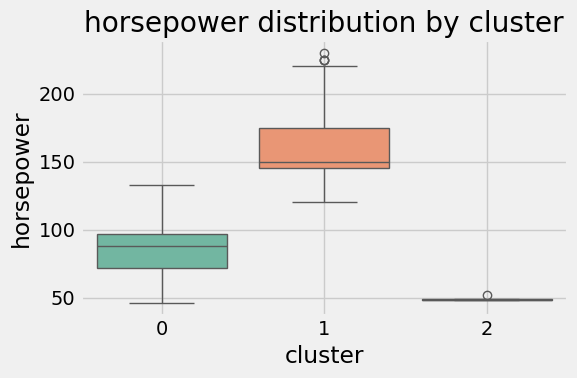

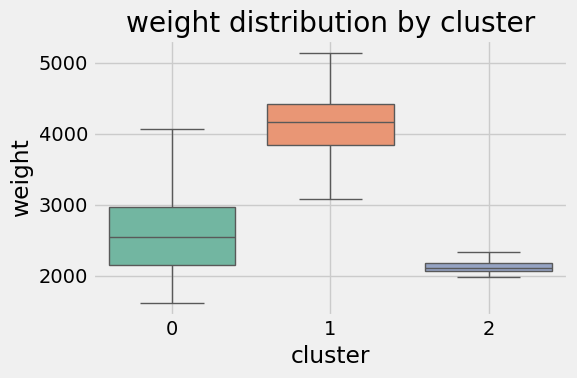

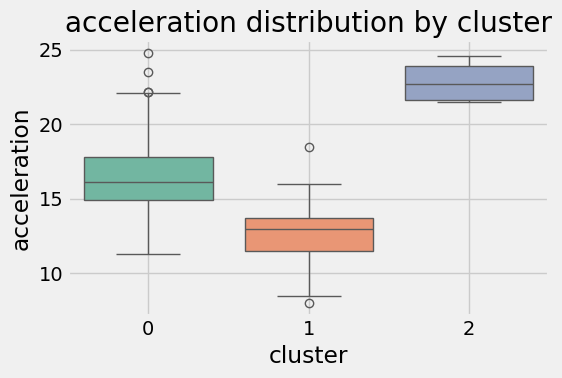

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

# 每个特征单独画图
for feature in continuous_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='cluster', y=feature, palette='Set2')
    plt.title(f'{feature} distribution by cluster')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"D:/PythonProject/Pictures/{feature}_cluster.png", dpi = 300)
    plt.show()

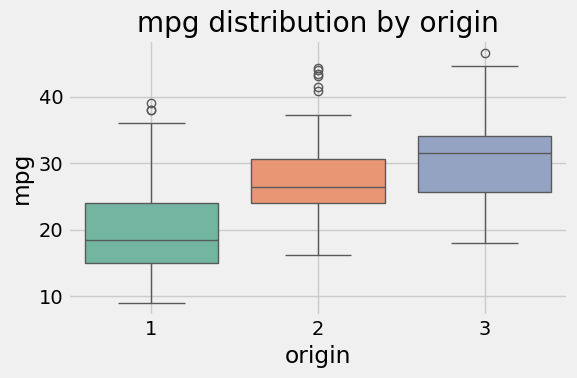

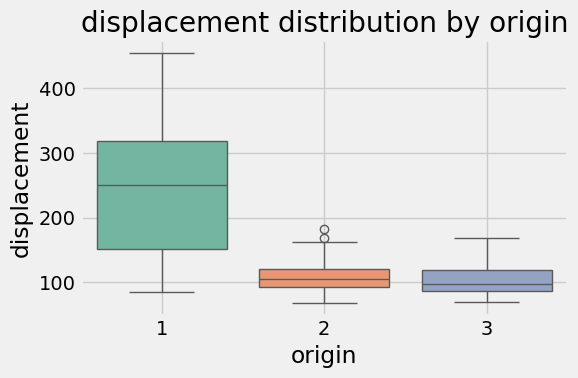

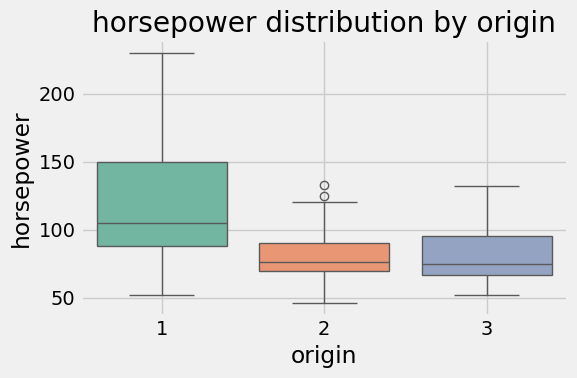

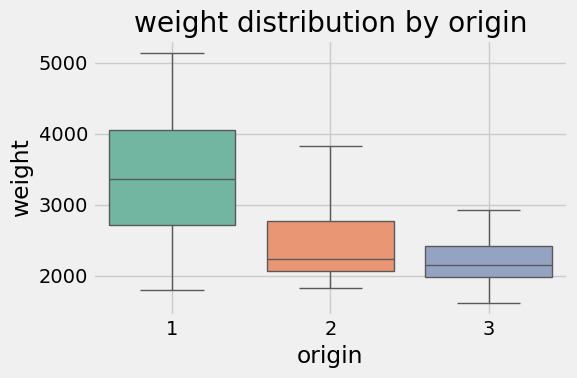

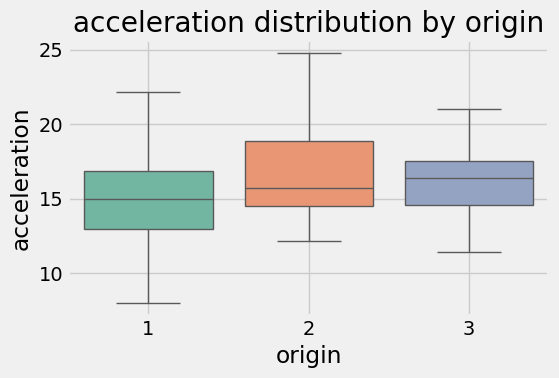

In [121]:
for feature in continuous_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='origin', y=feature, palette='Set2')
    plt.title(f'{feature} distribution by origin')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"D:/PythonProject/Pictures/{feature}_origin.png", dpi = 300)
    plt.show()

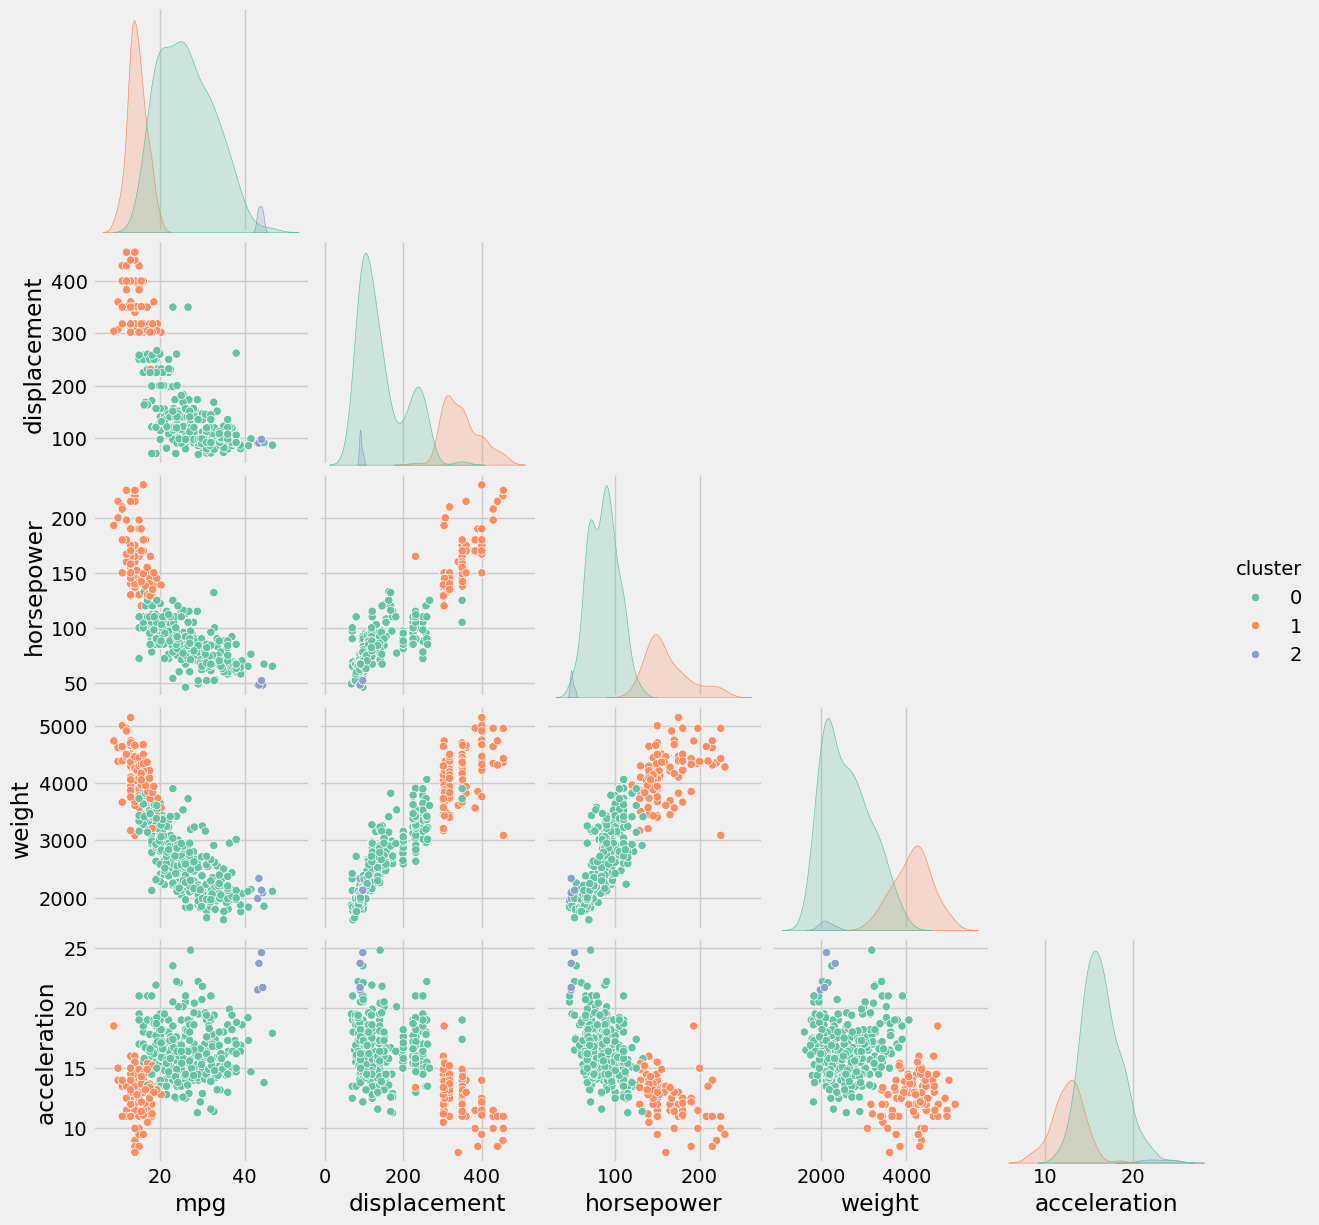

In [126]:
plot_features1 = ["mpg", "displacement", "horsepower", "weight", "acceleration", "cluster"]
df_plot1 = df[plot_features1]
sns.pairplot(df_plot1, hue = 'cluster', corner=True, palette='Set2')
plt.savefig('D:/PythonProject/Pictures/mpg_pairplot1.png', dpi = 300)

In [96]:
# 通过聚类与 origin 的交叉表分析聚类和 origin 之间的关系
cross_tab = pd.crosstab(df['cluster'], df['origin'])
print("Cross-tab between clusters and origin:\n", cross_tab)

Cross-tab between clusters and origin:
 origin     1   2   3
cluster             
0        152  66  79
1         97   0   0
2          0   4   0


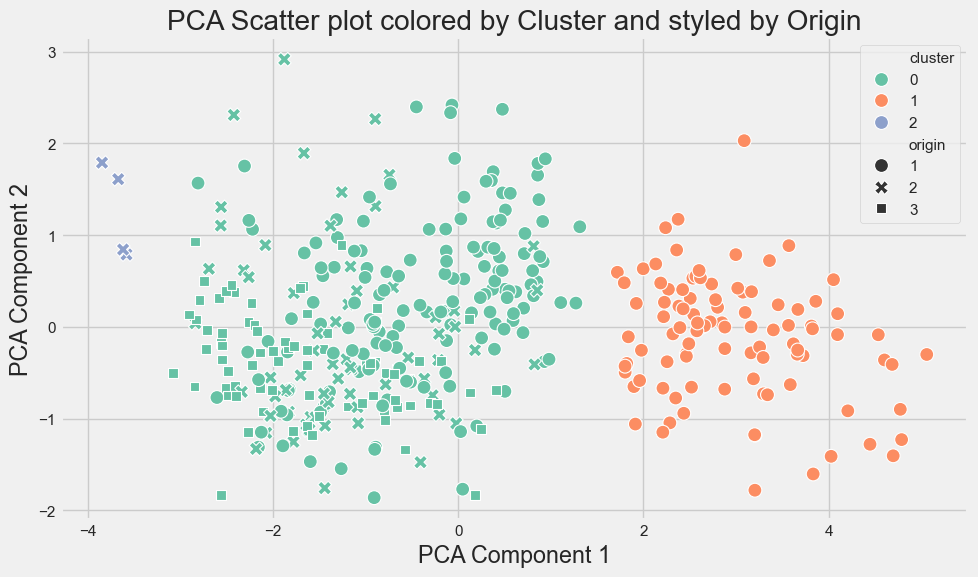

In [226]:
from sklearn.decomposition import PCA

# 用 PCA 将标准化数据降维到二维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 添加到原 DataFrame 中
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

# 绘图
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca1', y='pca2',
                hue='cluster', style='origin', palette='Set2', s=100)

plt.title('PCA Scatter plot colored by Cluster and styled by Origin')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.tight_layout()
plt.legend()
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('D:/PythonProject/Pictures/mpg_pca.png', dpi = 300)
plt.show()


In [100]:
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(df['origin'], df['cluster'])
print(f"Adjusted Rand Index (ARI): {ari:.3f}")


Adjusted Rand Index (ARI): -0.051


In [102]:
from sklearn.metrics import normalized_mutual_info_score

nmi = normalized_mutual_info_score(df['origin'], df['cluster'])
print(f"Normalized Mutual Information (NMI): {nmi:.3f}")


Normalized Mutual Information (NMI): 0.199


In [104]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

h = homogeneity_score(df['origin'], df['cluster'])
c = completeness_score(df['origin'], df['cluster'])
v = v_measure_score(df['origin'], df['cluster'])

print(f"Homogeneity: {h:.3f}, Completeness: {c:.3f}, V-measure: {v:.3f}")


Homogeneity: 0.165, Completeness: 0.250, V-measure: 0.199


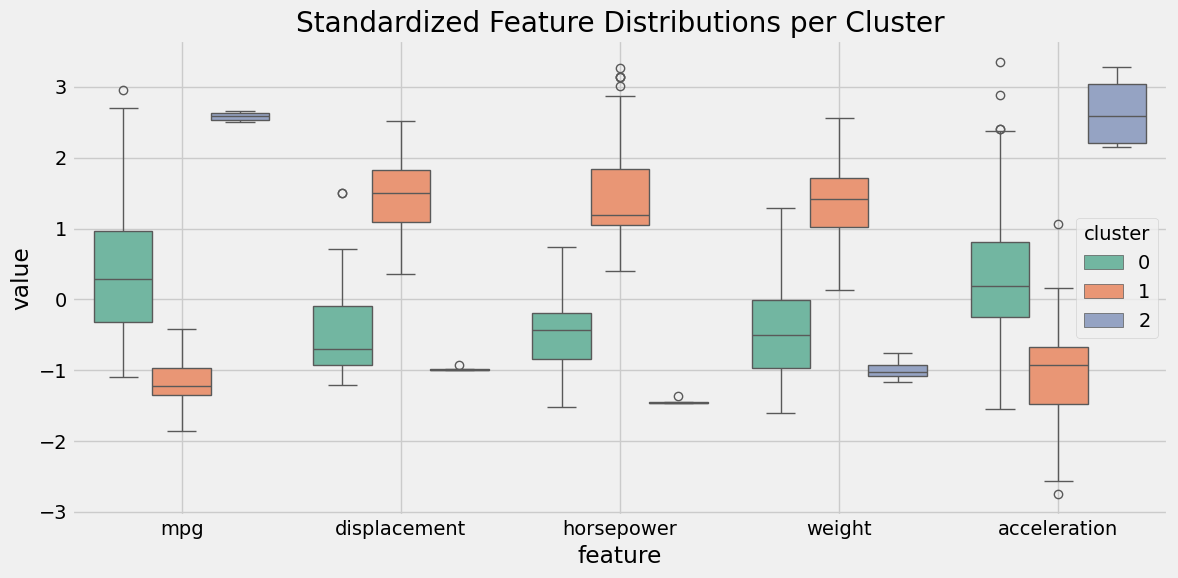

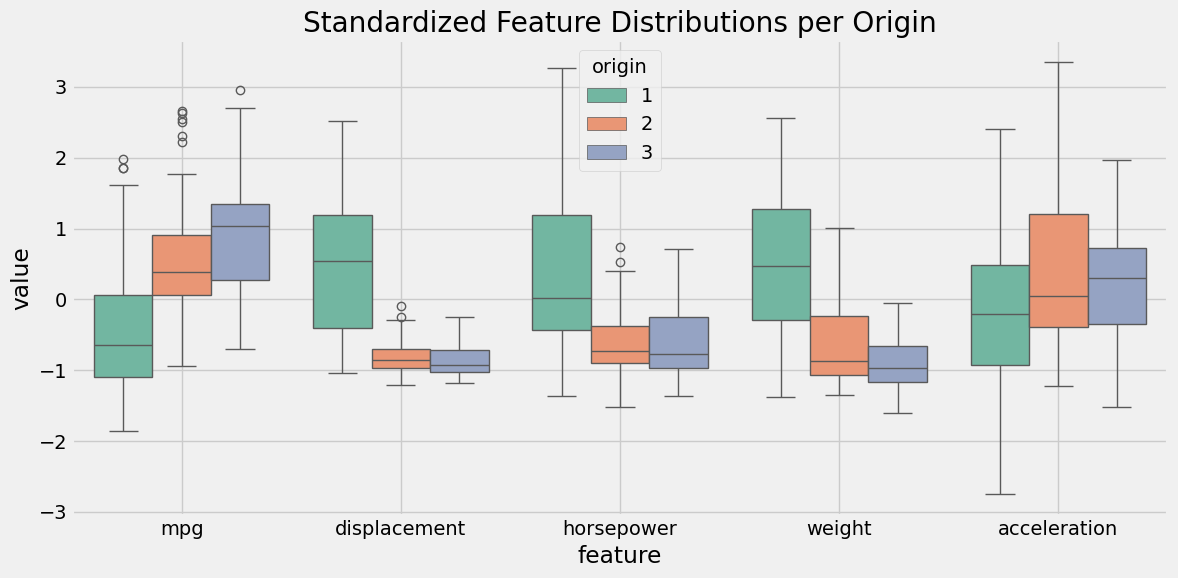

In [130]:
# 将原始 df 的连续特征列做标准化处理
df_norm = df.copy()
df_norm[continuous_features] = scaler.fit_transform(df[continuous_features])

# melt 再绘图
melted_norm = pd.melt(df_norm, id_vars=['cluster', 'origin'], value_vars=continuous_features,
                      var_name='feature', value_name='value')

# boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=melted_norm, x='feature', y='value', hue='cluster', palette='Set2')
plt.title('Standardized Feature Distributions per Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=melted_norm, x='feature', y='value', hue='origin', palette='Set2')
plt.title('Standardized Feature Distributions per Origin')
plt.grid(True)
plt.tight_layout()
plt.show()